# Rule 1: Never back the early kickoff ? 
One of the most common betting advice in football (EPL) is to never back the early. The early kick off is notorious for its uncertainty. 

Questions I want to answer:
*    Is it even true or just an anecdoctal belief?
*    How does it compare with the other kick off times?


Data was obtained from: [Football Data](https://www.football-data.co.uk/englandm.php). If interested, I have re-copied the datasets in my repository as well. 

For simplicity, I am using EPL seasons 2019/20, 2020/21 & 2021/22 in this particular project. 

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import & Preview Data

Dataset Key: 

**Match Details**  
`Div` = League Division  
`Date` = Match Date (dd/mm/yy)  
`Time` = Time of match kick off  
`HomeTeam` = Home Team  
`AwayTeam` = Away Team  
`FTHG and HG` = Full Time Home Team Goals  
`FTAG and AG` = Full Time Away Team Goals  
`FTR and Res` = Full Time Result (H=Home Win, D=Draw, A=Away Win)  
`HTHG` = Half Time Home Team Goals  
`HTAG` = Half Time Away Team Goals  
`HTR` = Half Time Result (H=Home Win, D=Draw, A=Away Win)  

**Odds features**  
`AvgH` = Market average home win odds  
`AvgD` = Market average draw win odds  
`AvgA` = Market average away win odds  


### Assumptions


1.   Remove Match Statistics such as Yellow Cards, Fouls since we are only interested in the final results.
2.   We are relying on bet odds to determine which team was the favourite(stronger team/likely to win).
3.   We are using the Average close bet odds (final bet odds) to decide the favourite/likelihood to win
4.   In the case of no avg close bet we will use B365 odds



In [ ]:
#load data #last three seasons
epl201920 = pd.read_csv('https://raw.githubusercontent.com/oanokyen/stats-analysis-projs/main/Early%20Kick%20Off%20-%20Statistical%20Analysis/data/EPL%2019_20.csv')
epl202021 = pd.read_csv('https://raw.githubusercontent.com/oanokyen/stats-analysis-projs/main/Early%20Kick%20Off%20-%20Statistical%20Analysis/data/EPL%2020_21.csv')
epl202122 = pd.read_csv('https://raw.githubusercontent.com/oanokyen/stats-analysis-projs/main/Early%20Kick%20Off%20-%20Statistical%20Analysis/data/EPL%2021_22.csv')


In [ ]:
# preview last season
epl201920.head(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [ ]:
print('There are {} columns in the epl 2019-20 season dataset'.format(len(epl201920.columns)))
print('There are {} columns in the epl 2020-21 season dataset'.format(len(epl202021.columns)))
print('There are {} columns in the epl 2021-22 season dataset'.format(len(epl202122.columns)))

There are 106 columns in the epl 2019-20 season dataset
There are 106 columns in the epl 2020-21 season dataset
There are 106 columns in the epl 2021-22 season dataset


### Data Cleaning & Transformation



*   concat-ing datasets in 1 dataframe
*   Selecting only columns of interest



In [ ]:
# add epl season as column
epl201920['EPL']='201920'
epl202021['EPL']='202021'
epl202122['EPL']='202122'

#join datasets
epl_last3_szn = pd.concat([epl201920,epl202021,epl202122])

#select columns of interest
epl_last3_cln = epl_last3_szn[['Date','Time','HomeTeam','AwayTeam','FTHG','FTAG','FTR','AvgCH','AvgCA','AvgCD','EPL']]




*   Converting date to datetime64 format
*   Added Day of the week to dataset
*   Retrieved early kickoff days
*   Subsetted a new dataframe of only early kick-off matches for other analysis



In [ ]:
# convert date column 
epl_last3_cln=epl_last3_cln.copy()
epl_last3_cln['Date'] = pd.to_datetime(epl_last3_cln['Date'],format='%d/%m/%Y')


# add day of week because early kick off happens only on saturdays
epl_last3_cln['Day']= epl_last3_cln['Date'].dt.day_name()

In [ ]:
# only return the first match on each date and get the times from it 
epl_last3_cln.drop_duplicates(subset=['Date'])['Time'].unique()

array(['20:00', '12:30', '14:00', '16:30', '19:30', '19:45', '18:00',
       '20:15', '12:00', '17:30', '16:00', '17:45', '15:00', '14:15',
       '13:30'], dtype=object)

In [ ]:
# early kickoff times in the data set
early_list = ['12:30','12:00']

#get early kick off data

epl_early_ko = epl_last3_cln[(epl_last3_cln['Time'].isin(early_list)) & (epl_last3_cln['Day']=='Saturday')]

In [ ]:
# added column of the least odds 
epl_last3_cln['m_like_odd'] = epl_last3_cln[['AvgCH','AvgCA','AvgCD']].idxmax(axis=1)

# added column for the least odds
epl_last3_cln['lst_odds'] = epl_last3_cln[['AvgCH','AvgCA','AvgCD']].min(axis='columns')

# added fulltime outcome odds
epl_last3_cln['FTRAvgOdds'] = np.where(epl_last3_cln['FTR']=='H',epl_last3_cln['AvgCH'],
                                       np.where(epl_last3_cln['FTR']=='A',epl_last3_cln['AvgCA'],epl_last3_cln['AvgCD']))


# added differential between fulltime odds and expected Odds
epl_last3_cln['Deviation'] = abs(epl_last3_cln['FTRAvgOdds']-epl_last3_cln['lst_odds']) # we are interested in the difference not under/over performance

# added a kick off type categorical column
epl_last3_cln['ko_type'] = np.where((epl_last3_cln['Time'].isin(early_list)) & (epl_last3_cln['Day']=='Saturday'),"Early Kick Off","Other Kick Off")

# added a binary column for correct odds projection
epl_last3_cln['proj_correct'] = np.where(epl_last3_cln['Deviation']>0,0,1)

#added # of matches (for count) 
epl_last3_cln['Match count'] = 1

epl_last3_cln

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,AvgCH,AvgCA,AvgCD,EPL,Day,m_like_odd,lst_odds,FTRAvgOdds,Deviation,ko_type,proj_correct,Match count
0,2019-08-09,20:00,Liverpool,Norwich,4,1,H,1.14,19.18,9.52,201920,Friday,AvgCA,1.14,1.14,0.00,Other Kick Off,1,1
1,2019-08-10,12:30,West Ham,Man City,0,5,A,11.14,1.26,6.46,201920,Saturday,AvgCH,1.26,1.26,0.00,Early Kick Off,1,1
2,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,D,1.98,3.96,3.58,201920,Saturday,AvgCA,1.98,3.58,1.60,Other Kick Off,0,1
3,2019-08-10,15:00,Burnley,Southampton,3,0,H,2.65,2.88,3.18,201920,Saturday,AvgCD,2.65,2.65,0.00,Other Kick Off,1,1
4,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,3.41,2.23,3.37,201920,Saturday,AvgCH,2.23,3.37,1.14,Other Kick Off,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2022-05-22,16:00,Crystal Palace,Man United,1,0,H,2.81,2.53,3.49,202122,Sunday,AvgCD,2.53,2.81,0.28,Other Kick Off,0,1
376,2022-05-22,16:00,Leicester,Southampton,4,1,H,1.71,4.52,4.29,202122,Sunday,AvgCA,1.71,1.71,0.00,Other Kick Off,1,1
377,2022-05-22,16:00,Liverpool,Wolves,3,1,H,1.14,19.12,9.22,202122,Sunday,AvgCA,1.14,1.14,0.00,Other Kick Off,1,1
378,2022-05-22,16:00,Man City,Aston Villa,3,2,H,1.17,15.87,8.27,202122,Sunday,AvgCA,1.17,1.17,0.00,Other Kick Off,1,1


### Grouped Data 

Grouped by:
*   League Season
*   Kick Off type (Early Kick of vs Others)



Metrics Explained

>*    FTRAvgOdds : The Full Time Results Average Odds i.e. The odds of the full time results happening based on the closing odds data (last odds available) before kick off. 

>*    Deviation : The difference between the closing odds for what happened to be the full time results and the least closing odds ( most likely outcome as predicted by the bookies)

>*    Proj_Correct : If the least closing odds (most likely outcome predicted by bookies/market) then the projection was correct (1). If not, then projection was incorrect (0) 

In [ ]:
# groupby mean of odds
epl_summary_A = epl_last3_cln[['EPL','ko_type','FTRAvgOdds', 'lst_odds','Deviation']].groupby(['EPL','ko_type']).mean()

# groupby total matches & matches that ended as the bookers expected
epl_summary_B = epl_last3_cln[['EPL','ko_type','Match count', 'proj_correct']].groupby(['EPL','ko_type']).sum()

# group both as a single summary table
epl_summary_tabl = epl_summary_A.join(epl_summary_B).reset_index()

# add percentage 
epl_summary_tabl['perc']=epl_summary_tabl['proj_correct']/epl_summary_tabl['Match count']

In [ ]:
# last three seasons EPL summary table
epl_summary_tabl

,EPL,ko_type,FTRAvgOdds,lst_odds,Deviation,Match count,proj_correct,perc
0,201920,Early Kick Off,2.630000,1.781613,0.848387,31,18,0.580645
1,201920,Other Kick Off,3.010860,1.888080,1.122779,349,185,0.530086
2,202021,Early Kick Off,3.589667,1.737333,1.852333,30,12,0.400000
3,202021,Other Kick Off,2.898800,1.911914,0.986886,350,185,0.528571
4,202122,Early Kick Off,2.732333,1.731667,1.000667,30,20,0.666667
5,202122,Other Kick Off,2.800229,1.896800,0.903429,350,205,0.585714


In [ ]:
# Summary Statistics
epl_summary_tabl.describe()

,FTRAvgOdds,lst_odds,Deviation,Match count,proj_correct,perc
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2.943648,1.824568,1.119080,190.000000,104.166667,0.548614
std,0.342773,0.083626,0.371201,174.906832,96.165309,0.088510
min,2.630000,1.731667,0.848387,30.000000,12.000000,0.400000
25%,2.749307,1.748403,0.924293,30.250000,18.500000,0.528950
50%,2.849514,1.834847,0.993776,190.000000,102.500000,0.555366
75%,2.982845,1.894620,1.092251,349.750000,185.000000,0.584447
max,3.589667,1.911914,1.852333,350.000000,205.000000,0.666667


### Visualizing Summary Table

In [ ]:
plot_x1 = epl_summary_tabl[epl_summary_tabl['ko_type']=='Early Kick Off']['EPL']
plot_x2 = epl_summary_tabl[epl_summary_tabl['ko_type']=='Other Kick Off']['EPL']

plot_y1 = epl_summary_tabl[epl_summary_tabl['ko_type']=='Early Kick Off']['Deviation']
plot_y2 = epl_summary_tabl[epl_summary_tabl['ko_type']=='Other Kick Off']['Deviation']

plot_y1_1 = epl_summary_tabl[epl_summary_tabl['ko_type']=='Early Kick Off']['FTRAvgOdds']
plot_y2_2 = epl_summary_tabl[epl_summary_tabl['ko_type']=='Other Kick Off']['FTRAvgOdds']

plot_y1_3 = epl_summary_tabl[epl_summary_tabl['ko_type']=='Early Kick Off']['perc']
plot_y2_4 = epl_summary_tabl[epl_summary_tabl['ko_type']=='Other Kick Off']['perc']

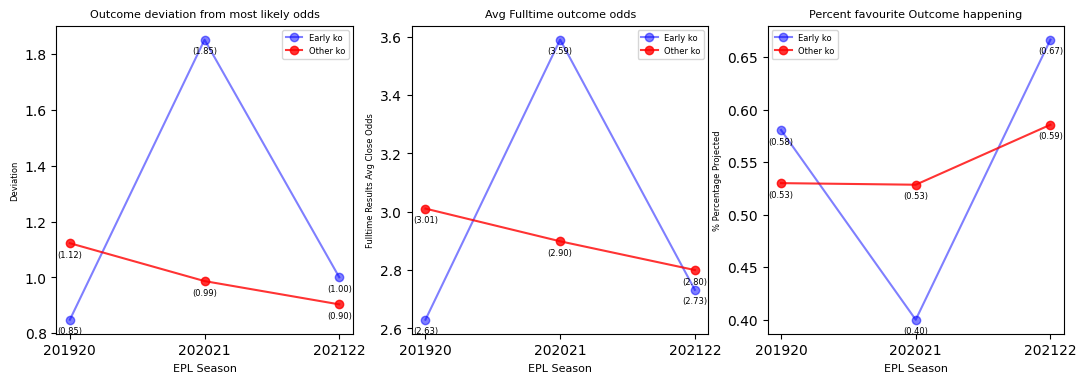

In [ ]:
# plot 1

fig,ax = plt.subplots(1,3, figsize=(13,4))
ax[0].plot(plot_x1,plot_y1,'-b',marker='o', label= 'Early ko', alpha=0.5)
ax[0].plot(plot_x2,plot_y2, '-r',marker='o', label = 'Other ko', alpha=0.8)
ax[0].legend(fontsize=6)
ax[0].set_title("Outcome deviation from most likely odds", fontsize=8)
ax[0].set_xlabel('EPL Season', fontsize = 8)
ax[0].set_ylabel('Deviation', fontsize=6)
for x,y in zip(epl_summary_tabl['EPL'],epl_summary_tabl['Deviation']):
  label = f"({y:.2f})"
  ax[0].annotate(label, (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center', fontsize=6)
  

# plot 2

ax[1].plot(plot_x1,plot_y1_1,'-b',marker='o', label= 'Early ko', alpha=0.5)
ax[1].plot(plot_x2,plot_y2_2, '-r',marker='o', label = 'Other ko', alpha=0.8)
ax[1].legend(fontsize=6)
ax[1].set_title("Avg Fulltime outcome odds", fontsize = 8)
ax[1].set_xlabel("EPL Season", fontsize = 8)
ax[1].set_ylabel('Fulltime Results Avg Close Odds', fontsize=6)
for x,y in zip(epl_summary_tabl['EPL'],epl_summary_tabl['FTRAvgOdds']):
  label = f"({y:.2f})"
  ax[1].annotate(label, (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center', fontsize=6)
  

# plot 3

ax[2].plot(plot_x1,plot_y1_3,'-b',marker='o', label= 'Early ko', alpha=0.5)
ax[2].plot(plot_x2,plot_y2_4, '-r',marker='o', label = 'Other ko', alpha=0.8)
ax[2].legend(fontsize=6)
ax[2].set_title("Percent favourite Outcome happening", fontsize = 8)
ax[2].set_xlabel("EPL Season", fontsize = 8)
ax[2].set_ylabel('% Percentage Projected', fontsize=6)
for x,y in zip(epl_summary_tabl['EPL'],epl_summary_tabl['perc']):
  label = f"({y:.2f})"
  ax[2].annotate(label, (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,-10), # distance from text to points (x,y)
                 ha='center', fontsize=6)
  
plt.show()

### Early Kick Off vs Other Kick Off accross last 3 seasons

>*   **Metrics 1 : Outcome Deviation from most likely outcome**  
In 2019-20 season, Early kick off matches deviated less than all the other kick offs **(0.85 compared to 1.12)**. In the 2021/22 season, early kick off matches deviated 0.10 more than Other kick off **(1.00 compared to 0.90)**. The most significant change came in the 2020/21 season where the early kick off matches clearly showed a higher deviation from the expected income. **1.85 deviation compared to 0.99** deviation from the other kick offs. 

>*   **Metrics 2: Avg Fulltime Outcome odds**  
Early kick-off matches had lower average fulltime outcome odds in both 2019/20 & 2021/22. Just like in metric 1, there was a difference in 2020/21 season. **Early kickoff had an average fulltime outcome odds of 3.59 compared to 2.90 for the other kick offs.**

>*   **Metrics 3: Percent Most Likely Outcome Predicted**   
Early kick-off matches closing odds predicted the correct outcome 58% & 67% of the time in EPL seasons 2019/20 & 2021/22 respectively. Both of these were higher than predictions for the other outcomes. However, in tandem with the other two metrics, in the season 2020/21, early kickoff closing odds only **predicted the correct outcome only 40% of the time.**



### All 3 seasons combined

In [49]:
# Summarize all 3 seasons
epl_all_A = epl_summary_tabl[['ko_type','FTRAvgOdds', 'lst_odds','Deviation']].groupby(['ko_type']).mean()

epl_all_B = epl_summary_tabl[['ko_type','Match count','proj_correct']].groupby('ko_type').sum()
epl_all_B['perc'] = epl_all_B['proj_correct']/epl_all_B['Match count']


epl_all = epl_all_A.join(epl_all_B).reset_index()

epl_all

,ko_type,FTRAvgOdds,lst_odds,Deviation,Match count,proj_correct,perc
0,Early Kick Off,2.984000,1.750204,1.233796,91,50,0.549451
1,Other Kick Off,2.903296,1.898932,1.004365,1049,575,0.548141


>*    Over the 3 seasons combined, **out of 91 sampled early kick off matches 50 had outcomes that were most likely expected to happen** according to the average closing odds representing a percentage of 54.9 %. 

>*    Over the 3 seasons combined, **out of 1049 other kick off matches sampled 575 had outcomes that were most likely expected to happen** according to the average closing odds representing a percentage of 54.8 %. 

##  Conclusion

> Accross seasons there are fluctuations between early kick off & other kick offs. However, combining all the 3 seasons seems to lead to similar results. 

> The first 2 metrics are affected by outliers but the last metric is not affected by outliers.

> In this dataset, both early kick off & late kick off lead to similar outcomes ie. there are no particular patterns indicating that early kick off is real in this dataset.

> However, to infer for other samples, dataset more controlled statistical analysis needs t be conducted that is beyond this work.

> In the 2020/21 season, there was a noticeable difference between late kick off & early kick off. (0.53% correct outcomes for other kick off vs 0.40 % correct outcomes for early kick off). Relying on simulation can help us uncover the randomness and its significance eventually.

> Overall, we found that over time (3 seasons) early of late kick off has no effect on the results. The most likely outcome as predicted by the bookies happen about 55 % of the time for both kick off types in this dataset.